<a href="https://colab.research.google.com/github/Sergei199352/Machine-Learning-Project/blob/main/report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset**

Thyroid Disease Data Set named "allbp.data" downloaded from the UCI machine learning repository on 28/10/22, contains the recods of patients with different Thtroid Desease. I chose this dataset because myself, my mother and my sister all suffer from hypothyroidism, so I had personal interest in exploring this type of data. This dataset comes accompanied by other files that provide some more information regarding the dataset and how t o read it. These files are: HELLO (provides information about where the information is coming from and how the information is presented), allbp.names(provides the column names which are not included in the dataset), allbp.test (a separate dataset that can be used to test the created model for ulterior development). The dataset and the Peer reviewed paper links can be found at the end of the report.

# **Objective**
There are two kinds of thyroid disease that , are included in this dataset, increased binding protein and decreased binding protein, so I will build a model to predict if the patient is affected by yhe desease and which one is it.

# **Peer Reviewed paper**


The paper I selected is called: “Decision trees: An overview and their use in Medicine”. In this paper the writer discusses different methods of applying the decision trees to the medical data, the Decision trees are good decision-making models that provide high classification accuracy with a simple presentation of the decision making process. Wich can be easily assessed by an expert and taken into consideration when reaching a diagnosis. 
## Combination of decision trees and other models
When comparing decision trees and neural networks, it can be noted that their advantages and drawbacks are almost complementary. While it is easy for humans to interpret the knowledge representation of decision trees it is not so in case of the neural networks, the neural networks are more efficient with dealing with noise in the dataset than the decision trees, while the decision trees models are faster at learning then neural network. Therefore, the idea is to combine the two models to unite their advantages. 
Another method which is used in medicine is to unite the evolutionary algorithm, which is used for complex optimization tasks, with the decision trees. AREX algorithm, is one of the most recent approaches to the evolutionary induction of decision trees-like methods. This approach includes the multi-level classification model, based on the difference between objects.
## Target of the paper
The paper discussed different methods that use decision trees model combined with other models to improve its efficiency, the methods are not superior to each other but are meant to be used for different and appropriate cases. The writer wanted to introduce this variety of methods to the reader and promote the usage of several methods instead of single one to resolve a problem.


# **Data Exploration**
In the following steps I will load the data and explore the dataset, I need to understand what kind of data it is and what must be done before I fit it into a model. I also load two separate binary data files provided by the UCI to aid the understanding of the data, and its processing.


In addition to loading the main dataset "d1" I will load another dataset that was provided by UCI which I will use to test my model once it has been trained. The second dataset follows the same format of the main dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import math



#loading the first dataset
d1 = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/mydataset/allbp.data", header = None)

#loading the second dataset

d2 = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/mydataset/allbp.test", header = None)

#additional files that provide more info regarding the datasets
file2 = open("/content/drive/MyDrive/ColabNotebooks/mydataset/HELLO")
file = open("/content/drive/MyDrive/ColabNotebooks/mydataset/allbp.names")
name = file.read()
info = file2.read()


In [ ]:
#data size
print(f"The dataset contains {d1.shape[0]} rows and {d1.shape[1]} columns")

The dataset contains 2800 rows and 30 columns


Now that i know the size of the dataset I will examine the information files provided by the UCI. 

In [ ]:
print(name)

;
; Thyroid disease records supplied by the Garavan Institute and J. Ross
; Quinlan, New South Wales Institute, Syndney, Australia.
;
; 1987.
;

increased binding protein, decreased binding protein,
negative.			|  classes

age:				continuous.
sex:				M, F.
on thyroxine:			f, t.
query on thyroxine:		f, t.
on antithyroid medication:	f, t.
sick:				f, t.
pregnant:			f, t.
thyroid surgery:		f, t.
I131 treatment:			f, t.
query hypothyroid:		f, t.
query hyperthyroid:		f, t.
lithium:			f, t.
goitre:				f, t.
tumor:				f, t.
hypopituitary:			f, t.
psych:				f, t.
TSH measured:			f, t.
TSH:				continuous.
T3 measured:			f, t.
T3:				continuous.
TT4 measured:			f, t.
TT4:				continuous.
T4U measured:			f, t.
T4U:				continuous.
FTI measured:			f, t.
FTI:				continuous.
TBG measured:			f, t.
TBG:				continuous.
referral source:		WEST, STMW, SVHC, SVI, SVHD, other.



This file contains the names of the columns for the dataset, and indicates the separation of the classes in each column, most columns have 2 categorical values, the target column has 3. 

In [ ]:
print(info)

          General Description of Thyroid Disease Databases 
                        and Related Files

This directory contains 6 databases, corresponding test set, and 
corresponding documentation.  They were left at the University of
California at Irvine by Ross Quinlan during his visit in 1987 for
the 1987 Machine Learning Workshop.  

The documentation files (with file extension "names") are formatted to
be read by Quinlan's C4 decision tree program.  Though briefer than
the other documentation files found in this database repository, they
should suffice to describe the database, specifically:

    1. Source
    2. Number and names of attributes (including class names)
    3. Types of values that each attribute takes

In general, these databases are quite similar and can be characterized
somewhat as follows:

    1. Many attributes (29 or so, mostly the same set over all the databases)
    2. mostly numeric or Boolean valued attributes
    3. thyroid disease domains (records provide

This file provides general information about the datasets in the repository where I downloaded mine, I would like to bring attention of the reader to the line "4. several missing attribute values (signified by "?")", which will be important during the data pre-processing.

## Columns

In [ ]:
d1.head(10)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative.|3733
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative.|1442
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative.|2965
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative.|806
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative.|2807
5,18,F,t,f,f,f,f,f,f,f,...,t,183,t,1.3,t,141,f,?,other,negative.|3434
6,59,F,f,f,f,f,f,f,f,f,...,t,72,t,0.92,t,78,f,?,other,negative.|1595
7,80,F,f,f,f,f,f,f,f,f,...,t,80,t,0.7,t,115,f,?,SVI,negative.|1367
8,66,F,f,f,f,f,f,f,f,f,...,t,123,t,0.93,t,132,f,?,SVI,negative.|1787
9,68,M,f,f,f,f,f,f,f,f,...,t,83,t,0.89,t,93,f,?,SVI,negative.|2534


In [ ]:
d1.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
           dtype='int64')

The dataset appears to be without column names and I will have to add column names myself by using the provided ones by the UCI in order to proceed with the data exploration.

In [ ]:
#the names were taken from the document provided by the UCI allbp.data
columns=["age","sex","on thyroxine","query on thyroxine" ,"on antithyroid medication","sick","pregnant","thyroid surgery","I131 treatment" ,"query hypothyroid" ,"query hyperthyroid","lithium" ,"goitre" ,"tumor","hypopituitary","psych","TSH m","TSH","T3 m","T3","TT4 m","TT4","T4U m","T4U","FTI m","FTI","TBG m","TBG","referral s", "Results"]


d1.columns = columns
d2.columns = columns

## Data Types 
Now that I included the names of the columns the data exploration of the dataset will be more meaningful. First I will assess the data types of the values in each column.

In [ ]:
d1.info() # thyis will show me the data types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        2800 non-null   object
 1   sex                        2800 non-null   object
 2   on thyroxine               2800 non-null   object
 3   query on thyroxine         2800 non-null   object
 4   on antithyroid medication  2800 non-null   object
 5   sick                       2800 non-null   object
 6   pregnant                   2800 non-null   object
 7   thyroid surgery            2800 non-null   object
 8   I131 treatment             2800 non-null   object
 9   query hypothyroid          2800 non-null   object
 10  query hyperthyroid         2800 non-null   object
 11  lithium                    2800 non-null   object
 12  goitre                     2800 non-null   object
 13  tumor                      2800 non-null   object
 14  hypopitu

Judging by the Dtype, I will have to reasess each column and transform each value into the numerical values. Luckily I was provided with the legend for each column, which I will use to iterate through the dataset and transform the variables into its respective integer or float values.

## Unique values
Here I will check how many unique values each column has.

In [ ]:
for i in d1.columns:
  #print how many features it has
  print(i, len(d1[i].unique()))

age 94
sex 3
on thyroxine 2
query on thyroxine 2
on antithyroid medication 2
sick 2
pregnant 2
thyroid surgery 2
I131 treatment 2
query hypothyroid 2
query hyperthyroid 2
lithium 2
goitre 2
tumor 2
hypopituitary 2
psych 2
TSH m 2
TSH 264
T3 m 2
T3 65
TT4 m 2
TT4 218
T4U m 2
T4U 139
FTI m 2
FTI 210
TBG m 1
TBG 1
referral s 5
Results 2800


Even though the document provided by the UCI states that the target variable has only 3 unique values (increased binding protein, decreased binding protein, negative.), the dataset suggests otherwise so  I will have to transform the target value into its numerical correspondent value. 

In [ ]:
# now i will print how columns have less then 10 unique values
for i in d1.columns:
  if len(d1[i].unique())<10:
    print(f"{i} has {len(d1[i].unique())} unique values, Thses are: {d1[i].unique()} ")

sex has 3 unique values, Thses are: ['F' 'M' '?'] 
on thyroxine has 2 unique values, Thses are: ['f' 't'] 
query on thyroxine has 2 unique values, Thses are: ['f' 't'] 
on antithyroid medication has 2 unique values, Thses are: ['f' 't'] 
sick has 2 unique values, Thses are: ['f' 't'] 
pregnant has 2 unique values, Thses are: ['f' 't'] 
thyroid surgery has 2 unique values, Thses are: ['f' 't'] 
I131 treatment has 2 unique values, Thses are: ['f' 't'] 
query hypothyroid has 2 unique values, Thses are: ['f' 't'] 
query hyperthyroid has 2 unique values, Thses are: ['f' 't'] 
lithium has 2 unique values, Thses are: ['f' 't'] 
goitre has 2 unique values, Thses are: ['f' 't'] 
tumor has 2 unique values, Thses are: ['f' 't'] 
hypopituitary has 2 unique values, Thses are: ['f' 't'] 
psych has 2 unique values, Thses are: ['f' 't'] 
TSH m has 2 unique values, Thses are: ['t' 'f'] 
T3 m has 2 unique values, Thses are: ['t' 'f'] 
TT4 m has 2 unique values, Thses are: ['t' 'f'] 
T4U m has 2 unique v

it can be seen that the columns "TBG m" and "TBG" have only one unique value and will have no effect on the target data so those can be droped during the data pre-processing. Also according to the document provided by the UCI the "refferal s column" contains the data regarding where the data is comming from so this column also can be dropped since it has no relation to the target data.

## Females Males Ratio
Next, I will check what is the class distribution in the sex column.

In [ ]:
sex = d1[d1.sex==1].shape[0]
print("Percentage of males in the dataset is", round(sex/d1.shape[0],2)*100)

Percentage of males in the dataset is 0.0


According to the function the majority of the dataset cases are females.

# **Data Pre-Processing**

## Target Variable
Fitrst I will deal with the target feature, according to the document provided by the UCI it can be separated into three categorical values  1 - (increased binding protein), 2 -(decreased binding protein), 0 - (negative). 

In [ ]:
# i iterate through the dataset in order to check the value
# once the value of the string has been assessed it will be replaced by a corresponding variable
for row in d1["Results"]:
  if "decreased" in str(row):
    d1["Results"] = d1["Results"].replace(row, int(1))
  elif "increased" in str(row):
    d1["Results"] = d1["Results"].replace(row, int(2))
  elif "negative" in str(row):
    d1["Results"] = d1["Results"].replace(row, int(0))


## Rest of the columns
Now I will proceed to transform the rest of the dataset into its numerical form by using the legend provided by the UCI.
NOTE The missing values, which are represented with the “?” character will be assigned the value of NaN.


In [ ]:

for column in d1.columns:
  for row in d1[column]:
    
    
    if "f" in str(row):
      d1[column] = d1[column].replace(row, int(0) )
    elif "t" in str(row):
      d1[column] = d1[column].replace(row, int(1) )
    elif "F" in str(row):
      d1[column] = d1[column].replace(row, int(0) )
    elif "M" in str(row):
      d1[column] = d1[column].replace(row, int(1) )





Next I will check again which columns have numerical values

In [ ]:
d1.head(5)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 m,TT4,T4U m,T4U,FTI m,FTI,TBG m,TBG,referral s,Results
0,41,0,0,0,0,0,0,0,0,0,...,1,125,1,1.14,1,109,0,?,SVHC,0
1,23,0,0,0,0,0,0,0,0,0,...,1,102,0,?,0,?,0,?,1,0
2,46,1,0,0,0,0,0,0,0,0,...,1,109,1,0.91,1,120,0,?,1,0
3,70,0,1,0,0,0,0,0,0,0,...,1,175,0,?,0,?,0,?,1,0
4,70,0,0,0,0,0,0,0,0,0,...,1,61,1,0.87,1,70,0,?,SVI,0


In [ ]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        2800 non-null   object
 1   sex                        2800 non-null   object
 2   on thyroxine               2800 non-null   int64 
 3   query on thyroxine         2800 non-null   int64 
 4   on antithyroid medication  2800 non-null   int64 
 5   sick                       2800 non-null   int64 
 6   pregnant                   2800 non-null   int64 
 7   thyroid surgery            2800 non-null   int64 
 8   I131 treatment             2800 non-null   int64 
 9   query hypothyroid          2800 non-null   int64 
 10  query hyperthyroid         2800 non-null   int64 
 11  lithium                    2800 non-null   int64 
 12  goitre                     2800 non-null   int64 
 13  tumor                      2800 non-null   int64 
 14  hypopitu

## Numerical Values as objects
As can be seen from the functions above, the following columns ["age", "TT4", "FTI", "TSH", "T3", "T4U"] have numerical value which use an object datatype which has to be changed in order to fit it into the model, so I will transform those next.

In [ ]:


# I create a loop which iterate through each value in a defined column
# then the if statement will wether the value is a "?"
# once its been confirmed the value of the row is not a "?" it will proceed to replace the contents of the row with its numeric value
# the said operations will be repeated for each column specified in the description  above   
for row in d1["age"]:
  if str(row) != "?" :
    d1["age"] = d1["age"].replace(row, int(row) )
  
    
for row in d1["TT4"]:
  if str(row) != "?" :
    d1["TT4"] = d1["TT4"].replace(row, float(row) )
 
    
for row in d1["FTI"]:
  if str(row) != "?" :
    d1["FTI"] = d1["FTI"].replace(row, float(row) )
    
for row in d1["TSH"]:
  if str(row) != "?" :
   d1["TSH"] = d1["TSH"].replace(row, float(row) )
    
for row in d1["T3"]:
  if str(row) != "?" :
    d1["T3"] = d1["T3"].replace(row, float(row) )
    

for row in d1["T4U"]:
  if str(row) != "?" :
    d1["T4U"] = d1["T4U"].replace(row, float(row) )
    
  

# **Identifying Missing values**
Here I will deal with any missing data in the dataset, I would like to remind the reader that the missing values in this dataset are represented by the “?” character.


## Sex column missing values
As discovered in the quick data exploration the majority of the cases in the dataset are female patients, for this reason, I will replace any missing data with female values.

In [ ]:
for row in d1["sex"]:
  if str(row) == "?" :
    d1["sex"] = d1["sex"].replace(row, int(0) )

## Question mark to NaN

Now I will proceed to transform the rest of the missing values to NaN.


In [ ]:
#this function will iterate through each of the column and each row and replace the "?" with the NaN type 
for column in d1.columns:
  for row in d1[column]:
    if "?" in str(row):
      d1[column] = d1[column].replace(row, np.NaN )


Now that I have changed the values of the dataset, I will check the datatypes again. 

In [ ]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2799 non-null   float64
 1   sex                        2800 non-null   int64  
 2   on thyroxine               2800 non-null   int64  
 3   query on thyroxine         2800 non-null   int64  
 4   on antithyroid medication  2800 non-null   int64  
 5   sick                       2800 non-null   int64  
 6   pregnant                   2800 non-null   int64  
 7   thyroid surgery            2800 non-null   int64  
 8   I131 treatment             2800 non-null   int64  
 9   query hypothyroid          2800 non-null   int64  
 10  query hyperthyroid         2800 non-null   int64  
 11  lithium                    2800 non-null   int64  
 12  goitre                     2800 non-null   int64  
 13  tumor                      2800 non-null   int64

Now that I dealt with the datatype of the values in the dataset I will check how many missing values.

In [ ]:
d1.isnull().sum()

age                             1
sex                             0
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH m                           0
TSH                           284
T3 m                            0
T3                            585
TT4 m                           0
TT4                           184
T4U m                           0
T4U                           297
FTI m                           0
FTI                           295
TBG m                           0
TBG                          2800
referral s                      0
Results       

In [ ]:
for i in d1.columns:
  #print how many features it has
  print(i, len(d1[i].unique()))

age 94
sex 2
on thyroxine 2
query on thyroxine 2
on antithyroid medication 2
sick 2
pregnant 2
thyroid surgery 2
I131 treatment 2
query hypothyroid 2
query hyperthyroid 2
lithium 2
goitre 2
tumor 2
hypopituitary 2
psych 2
TSH m 2
TSH 264
T3 m 2
T3 65
TT4 m 2
TT4 218
T4U m 2
T4U 139
FTI m 2
FTI 210
TBG m 1
TBG 1
referral s 4
Results 3


As I can see none of the columns with the categorical variables have missing values so I will proceed to fill the missing values with the mean value.

# **Dealing with the missing values**
The function below will calculate the mean value for each column and use it to fill in all the missing values.Also, as discussed preciously, I will be dropping the "refferal s" feature which, according to the materials provided by the UCI, contains the origin of the information and has no effect on the Target value since it states where the data comes from, not the patients' origins. 



In [ ]:
del d1["referral s"]

In [ ]:
for column in d1.columns:
  d1[column]=d1[column].fillna(d1[column].mean())



In [ ]:
d1.isnull().sum()

age                             0
sex                             0
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH m                           0
TSH                             0
T3 m                            0
T3                              0
TT4 m                           0
TT4                             0
T4U m                           0
T4U                             0
FTI m                           0
FTI                             0
TBG m                           0
TBG                          2800
Results                         0
dtype: int64

# Removing Unnecessary Features

As can be seen in the function above the TBG feature is composed exclusively of missing values, because the dataset has 2800 rows, for that reason I will be dropping that feature.


In [ ]:
for i in d1.columns:
  print(i, len(d1[i].unique()))


age 94
sex 2
on thyroxine 2
query on thyroxine 2
on antithyroid medication 2
sick 2
pregnant 2
thyroid surgery 2
I131 treatment 2
query hypothyroid 2
query hyperthyroid 2
lithium 2
goitre 2
tumor 2
hypopituitary 2
psych 2
TSH m 2
TSH 264
T3 m 2
T3 65
TT4 m 2
TT4 218
T4U m 2
T4U 139
FTI m 2
FTI 210
TBG m 1
TBG 1
Results 3


Also the features TBGm and TBG both have only one unique value so it is safe to drop these features as well since they will have no effect on the data.

In [ ]:
del d1["TBG m"]  
del d1["TBG"]



# Class Distribution
In this section I will investigate the class distribution among the features of the dataset.


## Target Value

In [ ]:
d1["Results"].value_counts()

0    2667
2     124
1       9
Name: Results, dtype: int64

Now i can see that my data is laregely imbalanced towards the negative cases. I will use seaborn bar plots to visualize the class distribution.

In [ ]:
pd.DataFrame({'Count':d1['Results'].value_counts()}).head(10)

,Count
0,2667
2,124
1,9


In [ ]:
#1 - (increased binding protein), 2 -(decreased binding protein), 0 - (negative).
# function to transform the labels for a better inrterpretation

def cases(label):
  if label == 1:
    return "incerased protein"
  elif label == 2:
    return "decreased protein"
  else:
    return "negative"

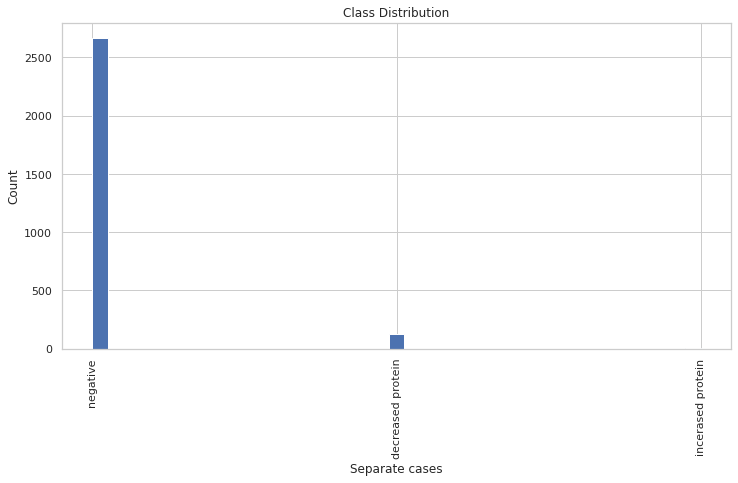

In [ ]:
import seaborn as sns



#assign the target feature 
r = d1.copy()
r["Results"] = r["Results"].apply(cases)
results = r["Results"]

#prepare the plot
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
plt.hist(results,bins=39)
#assign the name to the grath
plt.title('Class Distribution')
plt.xlabel('Separate cases')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.show()

This graph presents that in my dataset I have mostly negative cases, some positive cases of the decreased binding protein and almost no cases of the increased binding protein.

In [ ]:
# I will also present the class distribution of the target value using the percentages

patients_withpo = len(d1[d1.Results == 1])
patients_withper = len(d1[d1.Results == 2])
patients_withn = len(d1[d1.Results == 0])
print(f"persentage of patients with increased binding protein is {round(patients_withpo/d1.shape[0]*100,2)}%")
print(f"persentage of patients with decreased binding protein is {round(patients_withper/d1.shape[0]*100,2)}%")
print(f"persentage of patients with negative is {round(patients_withn/d1.shape[0]*100,2)}%")

persentage of patients with increased binding protein is 0.32%
persentage of patients with decreased binding protein is 4.43%
persentage of patients with negative is 95.25%


## Sex vs Target Value

Next I will display the relationship between the target value and the sex of the patient by using seaborn.

In [ ]:

#function to transform the labels for a better interpretation
from sklearn.metrics.cluster import fowlkes_mallows_score
def mF(label):
  if label == 0:
    return "Females"
  else:
    return "Males"


<ipython-input-417-f36580c2c7d6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds["sex"] = ds["sex"].apply(mF)
<ipython-input-417-f36580c2c7d6>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds2["sex"] = ds2["sex"].apply(mF)


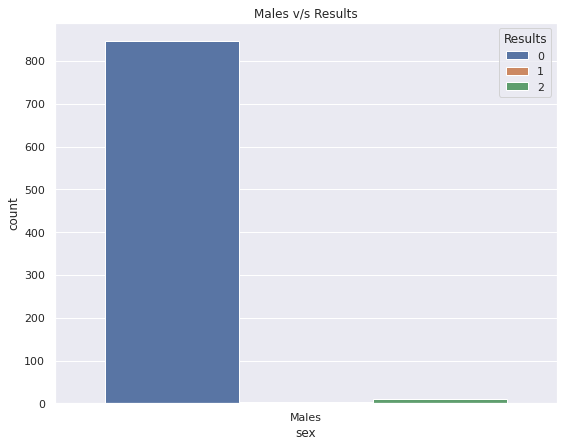

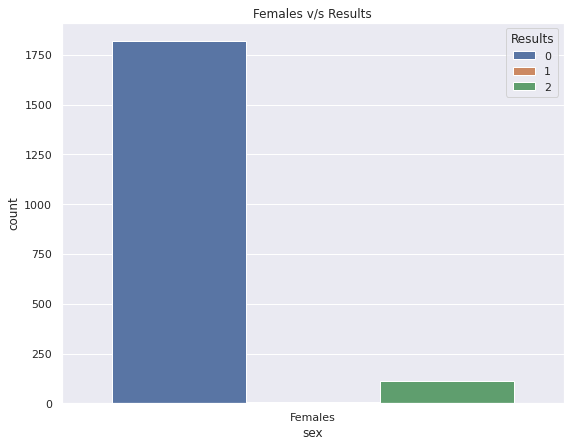

In [ ]:
import seaborn as sns
#to display how many man are affected by the desease 
ds = d1[d1["sex"] == 1]

#to display how many weamen are affected by the desease 
ds2 = d1[d1["sex"] == 0]


ds["sex"] = ds["sex"].apply(mF)


ds2["sex"] = ds2["sex"].apply(mF)









sns.set(rc={"figure.figsize":(9,7)})


sns.countplot(data = ds, x = "sex", hue="Results")

plt.title("Males v/s Results")
plt.show()
sns.set(rc={"figure.figsize":(9,7)})


sns.countplot(data = ds2, x = "sex", hue="Results")

plt.title("Females v/s Results")
plt.show()

Even though that there are more female than male patients in the dataset its still difficult to draw any significant conclusions due to the imbalanced nature of the data. But keeping in mind that there are twice as many female patients than males it can be concluded that the females and males are almost equally affected by this disease.

# Preparing the data

Now I will split the data into the x and y label to get it ready for the model training.


In [ ]:
#declaring the x and y variables
x = d1.drop("Results", axis = 1)
y = d1["Results"]


print(type(x))
print(type(y))



<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


## Dealing with undersampled data with SMOTE
In this section I will deal with the datasets' imbalance by fully oversampling the data, I will increase minority classes to equal majority class cases’ amounts and assign them to a separate variable which will be used to train a model separately.

In [ ]:
# import library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x, y)
y_smote.value_counts()

0    2667
2    2667
1    2667
Name: Results, dtype: int64

The data now is balanced but widely superficial, before I split and fit the data I will create more oversampled cases to assess the impact that the oversampling has. 

## Undersampling with NearMiss and then oversampling with Smote

In order to assess how oversampling affects models' performance I will create more cases. I will first undersample the majority class with Near Miss and then oversample the minority classes with SMOTE.

In [ ]:
from imblearn.under_sampling import NearMiss

#I will undersample the majority class to the 100 cases from 2800 
nm = NearMiss({0:500})
x_res, y_res = nm.fit_resample(x, y)


y_res.value_counts()



/usr/local/lib/python3.8/dist-packages/imblearn/utils/_validation.py:587: FutureWarning: Pass sampling_strategy={0: 500} as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


0    500
2    124
1      9
Name: Results, dtype: int64

In [ ]:
#then i will oversample the minority cases to match the undersampled majority class

x_resU, y_resU = smote.fit_resample(x_res, y_res)
y_resU.value_counts()

0    500
1    500
2    500
Name: Results, dtype: int64

# Splitting the data and training the models

Here I will split the data of each case and  train different models, I will create three models, Logistic Regression, Decision Tree, and Random forest. I will assess the performance of each model in the evaluation section.

##Models that use the No oversampling, splitting and fitting
Here I will fit the data without any kind of data altering techniques. 

### Spliting the data
Due to the extreme class unbalanced data I will do the train test split  0.5. To make sure that all the classes of the target value are present in both training and testing sets.

In [ ]:
#next i am splitting the data into the training and testing sets

from matplotlib import axis
from sklearn.model_selection import train_test_split
x_trainN, x_testN, y_trainN, y_testN = train_test_split( x, y,test_size = 0.5, random_state = 0)

### Data Normalisation
Since some of the data is greater then one it is a good idea to normalise the data to deal with the noise. And to improove the overall data quality.

In [ ]:
#normalising the data by using klearn preproscessing normalize function
from sklearn import preprocessing
x_trainN = preprocessing.normalize(x_trainN)
x_testN = preprocessing.normalize(x_testN)


### Creating the model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

#creating models
cl1N = LogisticRegression(solver='lbfgs',max_iter=2000,class_weight='balanced')
cl2N = DecisionTreeClassifier(random_state = 15)
cl3N = RandomForestClassifier(n_estimators=500,random_state=15)


### Fitting the data

In [ ]:
#Training models
logN = cl1N.fit(x_trainN, y_trainN)
decN = cl2N.fit(x_trainN, y_trainN)
forsN = cl3N.fit(x_trainN, y_trainN)

The evaluation of the models will happen in the evaluation section, this would make it easyer to see the differences in the precision.

## Models that use the Smote full oversampled data
Here I use the fully oversampled data to train the model, because the data is balanced I  will create the testing set of 30%. 


### Splitting the data

In [ ]:
#splitting the data into the training and testing sets

from matplotlib import axis
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote,y_smote,test_size = 0.3, random_state = 0)

### Data Normalisation


In [ ]:
from sklearn import preprocessing
#normalizing the data
x_train = preprocessing.normalize(x_train)
x_test = preprocessing.normalize(x_test)


### Creating the models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

#creating the models
cl1 = LogisticRegression(solver='lbfgs',max_iter=4000,class_weight='balanced')
cl2 = DecisionTreeClassifier(random_state = 15)
cl3 = RandomForestClassifier(n_estimators=500,random_state=15)


### Fitting the data

In [ ]:
#training the models
log = cl1.fit(x_train, y_train)
dec = cl2.fit(x_train, y_train)
fors = cl3.fit(x_train, y_train)

# all the evaluation will happen in the evaluation section for easyer model assessment


## **Undersampling with NearMiss and then resampling with Smote**

Here I will split the data that I first under sampled and then oversampled and use it to train the models.


### Splitting the data

In [ ]:
#next i am splitting the data into the training and testing sets

from matplotlib import axis
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_resU,y_resU,test_size = 0.3, random_state = 0)

### Data Normalisation


In [ ]:
from sklearn import preprocessing
#normalizing the data 
x_train1 = preprocessing.normalize(x_train1)
x_test1 = preprocessing.normalize(x_test1)


### Creating the models

In [ ]:

#creating the models
cl4 = LogisticRegression(solver='lbfgs',max_iter=4000,class_weight='balanced')
cl5 = DecisionTreeClassifier(random_state = 15)
cl6 = RandomForestClassifier(n_estimators=500,random_state=15)

### Fitting the data

In [ ]:
#training the models
log1 = cl4.fit(x_train1, y_train1)
dec1 = cl5.fit(x_train1, y_train1)
fors1 = cl6.fit(x_train1, y_train1)


# **Evaluation of all models**
In this section I will evaluate the performance of models in each section, I will use the gathered feedback to decide which model to use for the solution.

In [ ]:

#i will use this function to assign values to the correct prediction part of the dictionaries i will create
#this function will check the dictionary vlues compare and them 
def myFunc(x,y):
  if x == y:
    return 1
  else:
    return 0

## Evaluation of the model that uses non resampled data

The non-resampled dataset had to be split 50% to ensure the presence of all classes of the target variables in both sections of the split. Here I will display the value counts of each set.

In [ ]:


y_trainN.value_counts()

0    1331
2      61
1       8
Name: Results, dtype: int64

In [ ]:

y_testN.value_counts()

0    1336
2      63
1       1
Name: Results, dtype: int64

The problem of the imbalance in this dataset is severe, as can be seen the testing dataset has only one instance of the first class.

In [ ]:
#predicting the data by using the testing x data 

ypred_lN = logN.predict(x_testN)
ypred_dN = decN.predict(x_testN)
ypred_fN = forsN.predict(x_testN)
actN = y_testN
#assigning variables to the separate dictionaries
dnL = {"Actual":actN,"Prediction":ypred_lN, "correct":0}
dnd = {"Actual":actN,"Prediction":ypred_dN, "correct":0}
dnf = {"Actual":actN,"Prediction":ypred_fN, "correct":0}
#transforming the format of the dictionaries into datasets 
dnl = pd.DataFrame(dnL)
dnd = pd.DataFrame(dnd)
dnf = pd.DataFrame(dnf)

In [ ]:
#applying the myFunc to the results datasets to assess the accuracy
dnl["correct"] = dnl.apply(lambda x: myFunc(x.Actual, x.Prediction), axis = 1)
dnd["correct"] = dnd.apply(lambda x: myFunc(x.Actual, x.Prediction), axis = 1)
dnf["correct"] = dnf.apply(lambda x: myFunc(x.Actual, x.Prediction), axis = 1)

In [ ]:
from sklearn.metrics import accuracy_score
#using accuracy  score to assess the accuracy of the dataset
print(f"The Logistic Expression model accuracy on non resampled testing set is{round(accuracy_score(y_testN, ypred_lN),2)}")
print(f"The Decision Tree Classifier model accuracy on non resampled testing set is{round(accuracy_score(y_testN, ypred_dN),2)}")
print(f"The Random Forest Classifier model accuracy on testing non resampled testing set is{round(accuracy_score(y_testN, ypred_fN),2)}")

The Logistic Expression model accuracy on non resampled testing set is0.84
The Decision Tree Classifier model accuracy on non resampled testing set is0.95
The Random Forest Classifier model accuracy on testing non resampled testing set is0.97


All the models seem to have high levels of accuracy the Random forest seems to be the highest.

In [ ]:
from sklearn.metrics import classification_report
#using sklearn to find out the precision, f1 and recall
print(f"logistic reg{classification_report(y_testN, ypred_lN)}")
print(f"decision treeg{classification_report(y_testN, ypred_dN)}")
print(f"random forest{classification_report(y_testN, ypred_fN)}")


logistic reg              precision    recall  f1-score   support

           0       0.99      0.84      0.91      1336
           1       0.01      1.00      0.03         1
           2       0.27      0.87      0.41        63

    accuracy                           0.84      1400
   macro avg       0.43      0.90      0.45      1400
weighted avg       0.96      0.84      0.89      1400

decision treeg              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1336
           1       0.00      0.00      0.00         1
           2       0.50      0.59      0.54        63

    accuracy                           0.95      1400
   macro avg       0.49      0.52      0.50      1400
weighted avg       0.96      0.95      0.95      1400

random forest              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1336
           1       0.00      0.00      0.00         1
           2       0.74      0.46   

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


From the data above it can be seen that only Logistic regression was able to predict the one instance of the first class, even though the overall accuracy is high the precision and recall of the first- and second-class prediction is very low in all models.

In [ ]:
from sklearn.metrics import confusion_matrix
print(f"conf for L{confusion_matrix(y_testN, ypred_lN)}")
print(f"conf for d{confusion_matrix(y_testN, ypred_dN)}")
print(f"conf for f{confusion_matrix(y_testN, ypred_fN)}")

conf for L[[1118   70  148]
 [   0    1    0]
 [   8    0   55]]
conf for d[[1289   10   37]
 [   1    0    0]
 [  26    0   37]]
conf for f[[1326    0   10]
 [   1    0    0]
 [  34    0   29]]


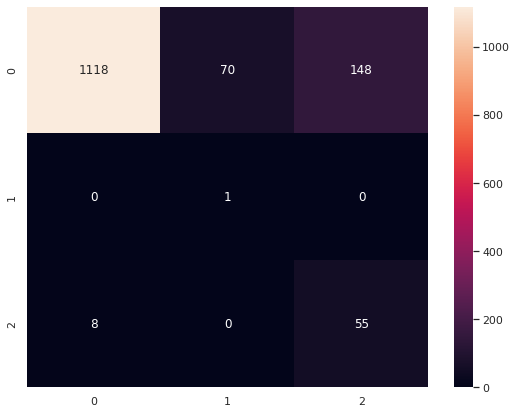

In [ ]:
import seaborn as sns
#logistic regression confusion matrix
ax1 = sns.heatmap(confusion_matrix(y_testN, ypred_lN), annot = True, fmt = "d")



Logistic regression has: 1118 of true negative predictions, 70 false positive predictions for the first class, and 148 false positive predictions second class. 
1 of true positive predictions first class, 0 false negatives, and 0 false positives   for second class.

55 of true positive predictions for the second class, 8 false negatives, and 0 false positives for 2 class.

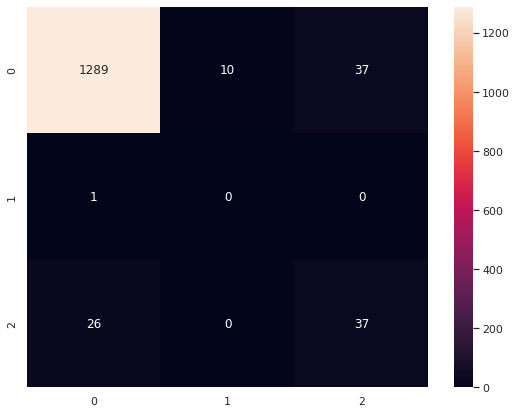

In [ ]:
#dec tree confusion matrix

ax2 = sns.heatmap(confusion_matrix(y_testN, ypred_dN), annot = True, fmt = "d")

Decision tree has 

1289 true negatives, 10 false positives 1st class, 37 false positives 2nd class,
0 of true positive predictions 1st class, 1 false negative, and 0 false positives for 2nd class.

37 of true positives 2nd class, 26 false negatives, and 0 false positives for 1st class.




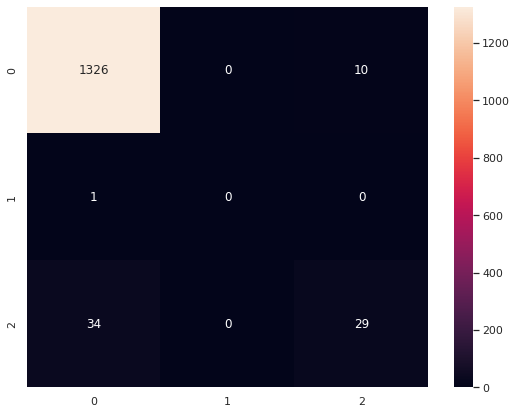

In [ ]:
#forest confusion matrix
ax3 = sns.heatmap(confusion_matrix(y_testN, ypred_fN), annot = True, fmt = "d")

Random Forest has: 

1326 true negatives, 0 false positives 1st class, 10 false positives 2nd class
0 of true positive predictions 1st class, 1 false negatives, and 0 false positives for 2nd class.

29 of true positives 2nd class, 34 false negatives, and 0 false positives for 1st class.

Without splitting the data I would say that Logistic Regression has best performance being able to predict the only positive case of the first class it shows some promise, out of this case I will proceed with testing of this model on the separate dataset. 

## Evaluation NearMiss then Smote Resampling
Here I will evaluate the models that were trained with SMOTE and NearMiss resampled data.

In [ ]:
#creating the prediction variables for each model

ypred_l = log1.predict(x_test1)
ypred_d = dec1.predict(x_test1)
ypred_f = fors1.predict(x_test1)


act1 = y_test1
dicL = {"Actual":act1,"Prediction":ypred_l, "correct":0}
dicd = {"Actual":act1,"Prediction":ypred_d, "correct":0}
dicf = {"Actual":act1,"Prediction":ypred_f, "correct":0}
dl = pd.DataFrame(dicL)
dd = pd.DataFrame(dicd)
df = pd.DataFrame(dicf)

In [ ]:

dl["correct"] = dl.apply(lambda x: myFunc(x.Actual, x.Prediction), axis = 1)
dd["correct"] = dl.apply(lambda x: myFunc(x.Actual, x.Prediction), axis = 1)
df["correct"] = dl.apply(lambda x: myFunc(x.Actual, x.Prediction), axis = 1)

In [ ]:
#accuracy score for each model in this section
from sklearn.metrics import accuracy_score
print(f"The Logistic Expression model accuracy on Smote and NearMiss resampled testing set is{round(accuracy_score(y_test1, ypred_l),2)}")
print(f"The Decision Tree Classifier model accuracy on Smote and NearMiss resampled testing set is{round(accuracy_score(y_test1, ypred_d),2)}")
print(f"The Random Forest Classifier model accuracy on testing Smote and NearMiss resampled set is{round(accuracy_score(y_test1, ypred_f),2)}")

The Logistic Expression model accuracy on Smote and NearMiss resampled testing set is0.93
The Decision Tree Classifier model accuracy on Smote and NearMiss resampled testing set is0.98
The Random Forest Classifier model accuracy on testing Smote and NearMiss resampled set is0.98


With near miss and smote resampling there is a noticeable increase in the model accuracy as shown by the function above. But I need to see the precision, recall and f1 scores to assess them fully. 

In [ ]:
from sklearn.metrics import classification_report
#classificatio report to see the precision, f1-score and recall
print(f"logistic reg{classification_report(y_test1, ypred_l)}")
print(f"decision trees{classification_report(y_test1, ypred_d)}")
print(f"random forest{classification_report(y_test1, ypred_f)}")


logistic reg              precision    recall  f1-score   support

           0       0.90      0.88      0.89       146
           1       0.91      0.96      0.94       142
           2       0.97      0.94      0.96       162

    accuracy                           0.93       450
   macro avg       0.93      0.93      0.93       450
weighted avg       0.93      0.93      0.93       450

decision trees              precision    recall  f1-score   support

           0       0.97      0.96      0.96       146
           1       0.96      0.99      0.98       142
           2       1.00      0.98      0.99       162

    accuracy                           0.98       450
   macro avg       0.97      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450

random forest              precision    recall  f1-score   support

           0       0.97      0.96      0.97       146
           1       0.96      1.00      0.98       142
           2       1.00      0.98   

With the partial under and oversampling the models seem to behave a lot better with the precision scores towards 100 %

In [ ]:
from sklearn.metrics import confusion_matrix
print(f"conf for L{confusion_matrix(y_test1, ypred_l)}")
print(f"conf for d{confusion_matrix(y_test1, ypred_d)}")
print(f"conf for f{confusion_matrix(y_test1, ypred_f)}")

conf for L[[128  13   5]
 [  5 137   0]
 [  9   0 153]]
conf for d[[140   6   0]
 [  1 141   0]
 [  4   0 158]]
conf for f[[140   6   0]
 [  0 142   0]
 [  4   0 158]]


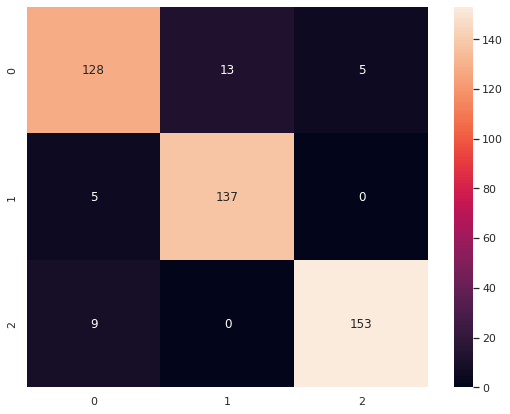

In [ ]:
import seaborn as sns
#logistic regression confusion matrix
ax1 = sns.heatmap(confusion_matrix(y_test1, ypred_l), annot = True, fmt = "d")



Logistic regression

0 (127 true negatives, 13 false positives 1st class,6 false positives 2nd class.),

1 (140 of true positive predictions 1st class, 2 false negatives, and 0 false positives for 2nd class.,
 
2 (155 of true positives 2nd class, 7 false negatives, and 0 false positives for 1st class.)


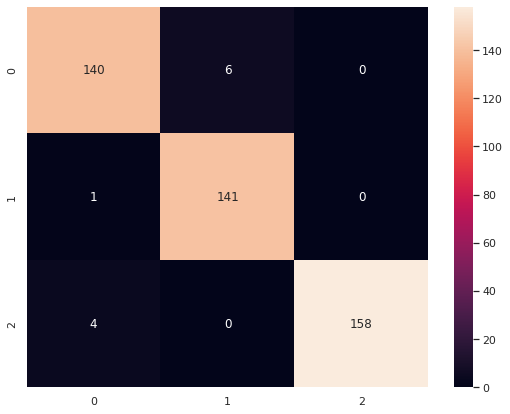

In [ ]:
#dec tree confusion matrix

ax2 = sns.heatmap(confusion_matrix(y_test1, ypred_d), annot = True, fmt = "d")

Decision Tree

0 (138 true negatives, 5 false positives 1st class, 3 false positives 2nd class.),

1 (142 of true positive predictions 1st class, 0 false negatives, and 0 false positives for 2nd class,

2 (160 of true positives 2nd class, 2 false negatives, and 0 false positives for 1st class.)


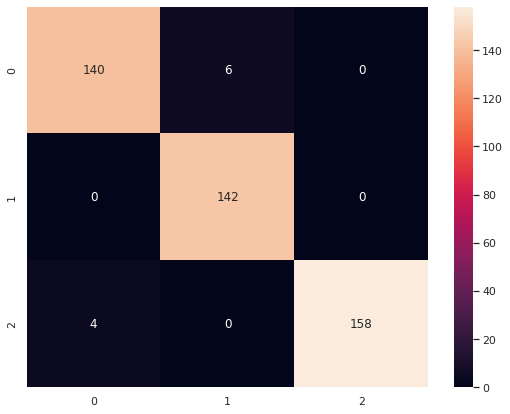

In [ ]:
#forest confusion matrix
ax3 = sns.heatmap(confusion_matrix(y_test1, ypred_f), annot = True, fmt = "d")

Random forest

0 (140 true negatives, 6 false positives 1st class, 0 false positives 2nd class.),

1 (142 of true positive predictions 1st class, 0 false negatives , and 0 false positives for 2nd class.,
 
2 (160 of true positives 2nd class, 2 false negatives, and 0 false positives for 1st class.)


Among the three models The Random forest seem to have best performance with fewer false positives and better precision rate then the other models. This model will be used for predictions on the separate dataset.

## Evaluation Smote oversampled

Here I will evaluate the models that were trained with the fully oversampled dataset with smote. 

In [ ]:

#creating the predictions
ypred_l = log.predict(x_test)
ypred_d = dec.predict(x_test)
ypred_f = fors.predict(x_test)
act = y_test
dicL = {"Actual":act,"Prediction":ypred_l, "correct":0}
dicd = {"Actual":act,"Prediction":ypred_d, "correct":0}
dicf = {"Actual":act,"Prediction":ypred_f, "correct":0}
dl = pd.DataFrame(dicL)
dd = pd.DataFrame(dicd)
df = pd.DataFrame(dicf)

In [ ]:

dl["correct"] = dl.apply(lambda x: myFunc(x.Actual, x.Prediction), axis = 1)
dd["correct"] = dl.apply(lambda x: myFunc(x.Actual, x.Prediction), axis = 1)
df["correct"] = dl.apply(lambda x: myFunc(x.Actual, x.Prediction), axis = 1)

In [ ]:
from sklearn.metrics import accuracy_score
#creating the accuracy score
print(f"The Logistic Expression model accuracy  on the smote oversampled testing set is{round(accuracy_score(y_test, ypred_l),2)}")
print(f"The Decision Tree Classifier model accuracy on the smote oversampled testing set is{round(accuracy_score(y_test, ypred_d),2)}")
print(f"The Random Forest Classifier model accuracy on the smote oversampled testing set is{round(accuracy_score(y_test, ypred_f),2)}")

The Logistic Expression model accuracy  on the smote oversampled testing set is0.92
The Decision Tree Classifier model accuracy on the smote oversampled testing set is0.98
The Random Forest Classifier model accuracy on the smote oversampled testing set is0.99


The accuracy score of the Random forest classifier is the highest, now I will explore the Precision, recall and f1-score.

In [ ]:
from sklearn.metrics import classification_report
print(f"logistic reg smote oversampled{classification_report(y_test, ypred_l)}")
print(f"decision treeg smote oversampled{classification_report(y_test, ypred_d)}")
print(f"random forest smote oversampled{classification_report(y_test, ypred_f)}")


logistic reg smote oversampled              precision    recall  f1-score   support

           0       0.89      0.88      0.88       800
           1       0.95      1.00      0.98       794
           2       0.92      0.90      0.91       807

    accuracy                           0.92      2401
   macro avg       0.92      0.92      0.92      2401
weighted avg       0.92      0.92      0.92      2401

decision treeg smote oversampled              precision    recall  f1-score   support

           0       0.97      0.96      0.96       800
           1       0.99      1.00      1.00       794
           2       0.97      0.97      0.97       807

    accuracy                           0.98      2401
   macro avg       0.98      0.98      0.98      2401
weighted avg       0.98      0.98      0.98      2401

random forest smote oversampled              precision    recall  f1-score   support

           0       0.99      0.97      0.98       800
           1       0.99      1.00   

Among the models evaluated the Random Forest seems to have the best precision and recall than the other models, it will be used on the separate dataset for the crossdataset evaluation.

In [ ]:
from sklearn.metrics import confusion_matrix
print(f"conf for L{confusion_matrix(y_test, ypred_l)}")
print(f"conf for d{confusion_matrix(y_test, ypred_d)}")
print(f"conf for f{confusion_matrix(y_test, ypred_f)}")

conf for L[[701  40  59]
 [  0 794   0]
 [ 84   0 723]]
conf for d[[768   5  27]
 [  2 792   0]
 [ 24   0 783]]
conf for f[[778   6  16]
 [  0 794   0]
 [  6   0 801]]


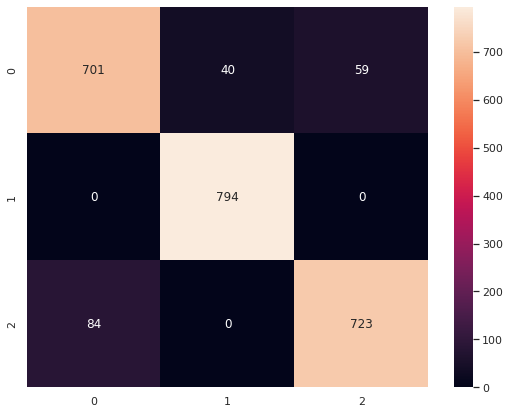

In [ ]:
import seaborn as sns
#logistic regression confusion matrix
ax1 = sns.heatmap(confusion_matrix(y_test, ypred_l), annot = True, fmt = "d")



Logistic Regression

0 (700 true negatives, 40 false positives 1st class, 60 false positives 2nd class.),

1 (794 of true positive predictions 1st class, 0 false false negatives, and 0 false positives for 2nd class.,

2 (746 of true positives 2nd class, 61 false negatives, and 0 false positives for 1st class.)

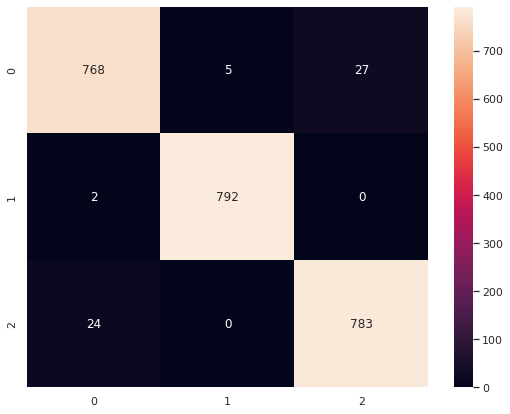

In [ ]:
#dec tree confusion matrix

ax2 = sns.heatmap(confusion_matrix(y_test, ypred_d), annot = True, fmt = "d")

Decision Tree

0 (767 true negatives, 6 false positives 1st class, 27 false positives 2nd class.),

1 (794 of true positive predictions 1st class, 0 false negatives, and 0 false positives for 2nd class.,

2 (788 of true positives 2nd class, 19 false false negatives, and 0 false positives for 1st class.)

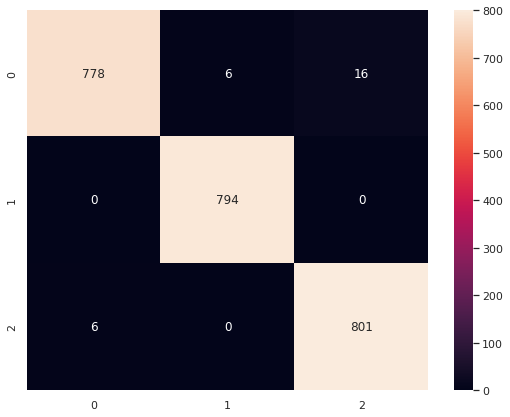

In [ ]:
#forest confusion matrix
ax3 = sns.heatmap(confusion_matrix(y_test, ypred_f), annot = True, fmt = "d")

Random Forest

0 (776 true negatives, 6 false negatives 1st class, 18 false negatives 2nd class.),

1 (794 of true positive predictions 1st class, 0 false positives for the 0 class, and 0 false positives for 2nd class.,

2 (801 of true positives 2nd class, 6 false negatives, and 0 false positives for 1st class.)

Among the models in this section, the best performing one apperas to be Random Forest. With fewer false positives and more true values.

# **Preparing the new dataset**
I will have to process the second dataset the same way I processed the main dataset.

In [ ]:
# i iterate through the dataset in order to check the value
# once the value of the string has been assessed it will be replaced by a corresponding variable
for row in d2["Results"]:
  if "decreased" in str(row):
    d2["Results"] = d2["Results"].replace(row, int(1))
  elif "increased" in str(row):
    d2["Results"] = d2["Results"].replace(row, int(2))
  elif "negative" in str(row):
    d2["Results"] = d2["Results"].replace(row, int(0))

In [ ]:
d2["Results"].value_counts()

0    942
2     25
1      5
Name: Results, dtype: int64

In [ ]:
d2.shape[0]

972

In [ ]:

for column in d2.columns:
  for row in d2[column]:
    
    
    if "f" in str(row):
      d2[column] = d2[column].replace(row, int(0) )
    elif "t" in str(row):
      d2[column] = d2[column].replace(row, int(1) )
    
      
    elif "F" in str(row):
      d2[column] = d2[column].replace(row, int(0) )
    elif "M" in str(row):
      d2[column] = d2[column].replace(row, int(1) )





In [ ]:


# I create a loop which iterate through each value in a defined column
# then the if statement will wether the value is a "?"
# once its been confirmed the value of the row is not a "?" it will proceed to replace the contents of the row with its numeric value
# the said operations will be repeated for each column specified in the description  above   
for row in d2["age"]:
  if str(row) != "?" :
    d2["age"] = d2["age"].replace(row, int(row) )
  
    
for row in d2["TT4"]:
  if str(row) != "?" :
    d2["TT4"] = d2["TT4"].replace(row, float(row) )
 
    
for row in d2["FTI"]:
  if str(row) != "?" :
    d2["FTI"] = d2["FTI"].replace(row, float(row) )
    
for row in d2["TSH"]:
  if str(row) != "?" :
   d2["TSH"] = d2["TSH"].replace(row, float(row) )
    
for row in d2["T3"]:
  if str(row) != "?" :
    d2["T3"] = d2["T3"].replace(row, float(row) )
    

for row in d2["T4U"]:
  if str(row) != "?" :
    d2["T4U"] = d2["T4U"].replace(row, float(row) )
    
  

In [ ]:
for row in d2["sex"]:
  if str(row) == "?" :
    d2["sex"] = d2["sex"].replace(row, int(0) )

In [ ]:
for column in d2.columns:
  for row in d2[column]:
    if "?" in str(row):
      d2[column] = d2[column].replace(row, np.NaN )


In [ ]:
del d2["referral s"]
del d2["TBG"]


In [ ]:
del d2["TBG m"]

In [ ]:
for column in d2.columns:
  d2[column]=d2[column].fillna(d2[column].mean())

# Cross Dataset Evaluation
From each evaluation stage I selected a model, now I will use those models on a separate dataset to test its performance. 

## Predicting variables

In [ ]:
#defining the x and y values

xr = d2.drop("Results", axis = 1)
yr = d2["Results"]




In [482]:
#predicting the values using the new data on the selected models
ypN = logN.predict(xr)
ypMS = fors1.predict(xr)
ypS = fors.predict(xr)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


## Evaluating the models' performance

##Accuracy scores

In [483]:
#the accuracy scores for each selected model

print(f"The Logistic Expression model trained on non resampled dataset{round(accuracy_score(yr, ypN),2)}")
print(f"The Random Forest Classifier model trained on Smote and NearMiss resampled dataset  accuracy score{round(accuracy_score(yr, ypMS),2)}")
print(f"The Random Forest Classifier model trained on smote oversampled dataset accuracy score{round(accuracy_score(yr, ypS),2)}")

The Logistic Expression model trained on non resampled dataset0.95
The Random Forest Classifier model trained on Smote and NearMiss resampled dataset  accuracy score0.92
The Random Forest Classifier model trained on smote oversampled dataset accuracy score0.97


The Random Forest trained on the smote oversampled dataset seems to be the best accuracy score (0.97) , now I will examine the precision, recall and f1-score to get a better insight into the models' performance. 

## Classification reports


In [484]:
# This function prints out the classification reports for each model

print(f"logistic regression trained on non resampled dataset {classification_report(yr, ypN)}")
print(f"The Random Forest Classifier model trained on smote oversampled dataset {classification_report(yr,ypS)}")
print(f"The Random Forest Classifier model trainde on Smote and NearMiss resampled dataset {classification_report(yr,ypMS)}")

logistic regression trained on non resampled dataset               precision    recall  f1-score   support

           0       0.98      0.97      0.98       942
           1       0.21      1.00      0.34         5
           2       0.50      0.28      0.36        25

    accuracy                           0.95       972
   macro avg       0.56      0.75      0.56       972
weighted avg       0.96      0.95      0.96       972

The Random Forest Classifier model trained on smote oversampled dataset               precision    recall  f1-score   support

           0       0.97      1.00      0.98       942
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00        25

    accuracy                           0.97       972
   macro avg       0.32      0.33      0.33       972
weighted avg       0.94      0.97      0.95       972

The Random Forest Classifier model trainde on Smote and NearMiss resampled dataset               precision    rec

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

Event with a higher accuracy the Random forest fails to predict any true positives, so does the Decision tree. Logistic regression seems to have the best performance among the 3 models. Logistic Regression seems to be the most appropriate model for this dataset, and the oversampling of the data allows the other models to predict the negative cases with high precision but fails to train them to predict the positive cases.

## Confusion Matrix

### Confusion matrix logistic regression trained on non resampled dataset

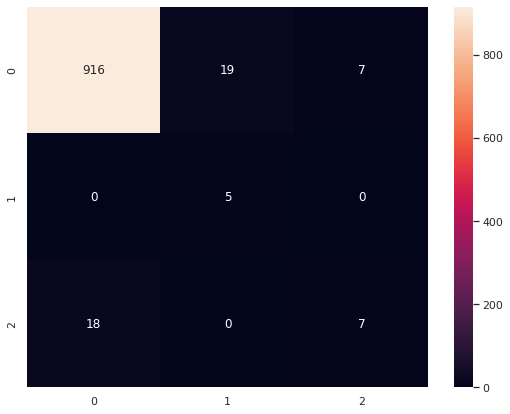

In [ ]:
ax3 = sns.heatmap(confusion_matrix(yr, ypN), annot = True, fmt = "d")



0 (916 true negatives, 19 false positives 1st class, 7 false positives 2nd class.),

1 (5 of true positive predictions 1st class, 0 false negatives, and 0 false positives for 2nd class.,

2 (7 of true positives 2nd class, 18 false negatives, and 0 false positives for 1st class.)

### Confusion matrix  Random Forest Classifier model trained on smote oversampled dataset

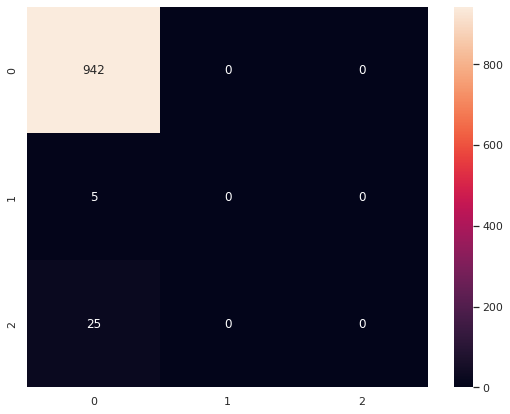

In [ ]:
ax3 = sns.heatmap(confusion_matrix(yr, ypS), annot = True, fmt = "d")



0 (942 true negatives, 0 false positives 1st class, 0 false positives 2nd class.),

1 (0 of true positive predictions 1st class, 5 false negatives, and 0 false positives for 2nd class.,

2 (25 of true positives 2nd class, 0 false negatives, and 0 false positives for 1st class.)

### Random Forest Classifier model trained on Smote and NearMiss resampled dataset 

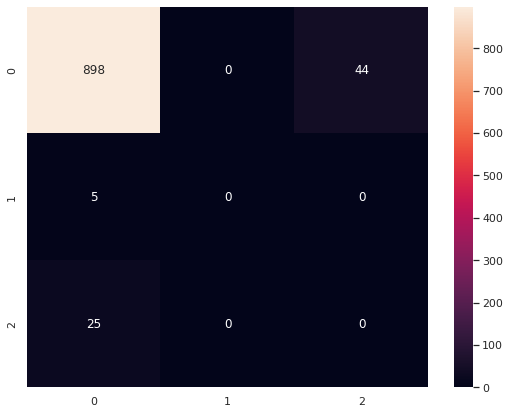

In [ ]:
ax3 = sns.heatmap(confusion_matrix(yr, ypMS), annot = True, fmt = "d")

0 (894 true negatives, 0 false positives 1st class, 48 false positives 2nd class.),

1 (0 of true positive predictions 1st class, 5 false negatives class, and 0 false positives for 2nd class.,

2 (0 of true positives 2nd class, 25 false negatives, and 0 false positives for 1st class.)

Among the models in this chapter Logistic regression trained on non resampled data is best performing. Its the only model that is able to predict the  true positives in the second and first classes. Still the precision in predicting the positives is very low, that means that there are too many of false positives. 

# **Summary**
The selected dataset was explored, prepared, and analysed. From this report I can draw conclusion that oversampling techniques are efficient only to a certain point, the models that are trained on that kind of data are going to perform well on the spitted testing set but not on a separate dataset. For that reason, the oversampling must be combined with other methods of the data balancing techniques. The true positives precision of the models trained on the oversampled datasets drops during the cross-dataset testing, but remains high on the splitted testing dataset. While the Precision of the true negatives remains high. That would indicate that the oversampled nature of the dataset is very damaging to the models' performance.

## Solution
The Logistic regression selected for the solution has a high true negative precision but a low precision in predicting the positive cases, even though I would not have time to proceed with the following actions, I would say that the model performance can be improved by assigning the class weight, trying different solvers, and changing other parameters.

# **The Paper Link**



*   Vili Podgorelec, Peter Kokol, Bruno Stiglic, Ivan Rozman. (October 2002). **Decision Trees: An Overview and Their Use in Medicine.** [Online]. www.researchgate.net. Last Updated: November 2002. Available at: https://www.researchgate.net/publication/11205595_Decision_Trees_An_Overview_and_Their_Use_in_Medici [Accessed 28/10/22].




# **The Dataset Links**


*   UCI. (N/A). **The main Dataset**. [Online]. http://archive.ics.uci.edu/. Downloaded on: 28/10/22. Available at: http://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/allbp.data.
*   UCI. (N/A). **The Second Dataset**. [Online]. http://archive.ics.uci.edu/. Downloaded on: 28/10/22. Available at: http://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/allbp.test
* UCI. (N/A). **The Column Names**. [Online]. http://archive.ics.uci.edu/. Downloaded on: 28/10/22. Available at: http://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/allbp.names
* UCI. (N/A). **The General information**. [Online]. http://archive.ics.uci.edu/. Downloaded on: 28/10/22. Available at: http://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/HELLO



# **References.**



*   N/A. (On July 23, 2020). 10 Techniques to deal with Imbalanced Classes in Machine Learning. [Online]. https://www.analyticsvidhya.com/. Last Updated: November 30th, 2022. Available at: https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-l [Accessed 8 December 2022].
*  Guillaume Lemaitre. (N/A). NearMiss. [Online]. https://imbalanced-learn.org/. Last Updated: N/A. Available at: https://imbalanced-learn.org/dev/references/generated/imblearn.under_sampling.NearMiss.html [Accessed 8 December 2022].
* Jason Brownlee. (January 17, 2020). SMOTE for Imbalanced Classification with Python. [Online]. https://machinelearningmastery.com/. Last Updated: March 17, 2021. Available at: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/ [Accessed 8 December 2022].





near miss 
https://imbalanced-learn.org/dev/references/generated/imblearn.under_sampling.NearMiss.html

# **Google Colab Link**

https://colab.research.google.com/drive/15ji-DBx3eBkKXH6AY8M4fnSImLCkqyhy?usp=sharing

# **GitHub Repository Link**

In [ ]:
!jupyter nbconvert --to HTML /content/drive/MyDrive/ColabNotebooks/mydataset/report.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/ColabNotebooks/mydataset/report.ipynb to HTML
[NbConvertApp] Writing 550803 bytes to /content/drive/MyDrive/ColabNotebooks/mydataset/report.html
